In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


CNN ARCHITECTURE MODEL

In [18]:
#CNN Architecture

#LeNET type CNN Architecture

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


train_d = pd.read_csv('/content/gdrive/MyDrive/train (1).csv')
X=train_d.drop(['labels'],axis=1)
y = train_d['labels'].values



test_d = pd.read_csv('/content/gdrive/MyDrive/test.csv')
test_d2 = pd.read_csv('/content/gdrive/MyDrive/test.csv')
test_X=test_d.drop(['id'],axis=1)



train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
train_s= scaler.fit_transform(train_X)
test_s = scaler.transform(test_X)
val_s=scaler.transform(val_X)



train_s_r = train_s.reshape(-1, 20, 20, 3)
val_s_r=val_s.reshape(-1, 20, 20, 3)
test_s_r = test_s.reshape(-1, 20, 20, 3)

In [19]:
model = Sequential()
model.add(Conv2D(40, kernel_size=(3, 3), activation='relu', input_shape=(20, 20, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(70, kernel_size=(4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/30
132/132 [==============================] - 4s 24ms/step - loss: 2.6455 - accuracy: 0.7207 - val_loss: 0.9757 - val_accuracy: 0.7438
Epoch 2/30
132/132 [==============================] - 3s 22ms/step - loss: 0.7283 - accuracy: 0.7507 - val_loss: 0.5821 - val_accuracy: 0.7829
Epoch 3/30
132/132 [==============================] - 5s 36ms/step - loss: 0.5750 - accuracy: 0.7917 - val_loss: 0.5328 - val_accuracy: 0.8305
Epoch 4/30
132/132 [==============================] - 3s 23ms/step - loss: 0.5391 - accuracy: 0.8107 - val_loss: 0.5164 - val_accuracy: 0.8333
Epoch 5/30
132/132 [==============================] - 3s 22ms/step - loss: 0.5232 - accuracy: 0.8205 - val_loss: 0.5109 - val_accuracy: 0.8343
Epoch 6/30
132/132 [==============================] - 3s 22ms/step - loss: 0.5076 - accuracy: 0.8336 - val_loss: 0.5126 - val_accuracy: 0.8362
Epoch 7/30
132/132 [==============================] - 5s 34ms/step - loss: 0.4910 - accuracy: 0.8464 - val_loss: 0.5091 - val_accuracy: 0.8333

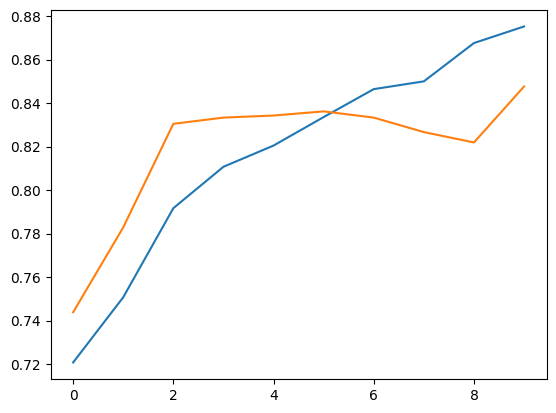

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3)


history=model.fit(train_s_r, train_y, batch_size=32, epochs=30, validation_data=(val_s_r, val_y),callbacks=[early_stopping])
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')


In [21]:
y_pred = model.predict(test_s_r)
y_final = np.round(y_pred).flatten()

71/71 [==============================] - 1s 6ms/step


In [22]:
solution = pd.DataFrame(y_final,columns=['labels'])
solution['id']=0;
for i in range(len(solution)):
    solution.at[i, 'id'] = i + 1

solution= solution.rename(columns={'labels': 'id', 'id': 'labels'})
solution['labels'], solution['id'] = solution['id'], solution['labels']
solution

,id,labels
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
2245,2246,0.0
2246,2247,0.0
2247,2248,1.0
2248,2249,0.0


In [23]:
solution.to_csv('solution_cnn.csv', index=False)